In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/DATASETS/NUS Hand Posture dataset-II-edit/Hand Postures/train'
valid_path = '/content/drive/MyDrive/DATASETS/NUS Hand Posture dataset-II-edit/Hand Postures/valid'


In [6]:
# Import the inceptionv3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [7]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/DATASETS/NUS Hand Posture dataset-II-edit/Hand Postures/train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [10]:
folders

['/content/drive/MyDrive/DATASETS/NUS Hand Posture dataset-II-edit/Hand Postures/train/j_Sideway_pointer',
 '/content/drive/MyDrive/DATASETS/NUS Hand Posture dataset-II-edit/Hand Postures/train/h_Pistol',
 '/content/drive/MyDrive/DATASETS/NUS Hand Posture dataset-II-edit/Hand Postures/train/c_Pointer',
 '/content/drive/MyDrive/DATASETS/NUS Hand Posture dataset-II-edit/Hand Postures/train/i_Bird',
 '/content/drive/MyDrive/DATASETS/NUS Hand Posture dataset-II-edit/Hand Postures/train/f_Bridge',
 '/content/drive/MyDrive/DATASETS/NUS Hand Posture dataset-II-edit/Hand Postures/train/b_Open',
 '/content/drive/MyDrive/DATASETS/NUS Hand Posture dataset-II-edit/Hand Postures/train/g_Hold',
 '/content/drive/MyDrive/DATASETS/NUS Hand Posture dataset-II-edit/Hand Postures/train/e_Okay',
 '/content/drive/MyDrive/DATASETS/NUS Hand Posture dataset-II-edit/Hand Postures/train/d_Rock',
 '/content/drive/MyDrive/DATASETS/NUS Hand Posture dataset-II-edit/Hand Postures/train/a_Close']

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [12]:

# view the structure of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,314,794 (85.12 MB)

 Trainable params: 512,010 (1.95 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DATASETS/NUS Hand Posture dataset-II-edit/Hand Postures/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2000 images belonging to 10 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DATASETS/NUS Hand Posture dataset-II-edit/Hand Postures/train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2000 images belonging to 10 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1006s 16s/step - accuracy: 0.3111 - loss: 14.9047 - val_accuracy: 0.6610 - val_loss: 3.0808
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 88s 692ms/step - accuracy: 0.7641 - loss: 1.7537 - val_accuracy: 0.8640 - val_loss: 0.7980
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 698ms/step - accuracy: 0.8617 - loss: 0.9432 - val_accuracy: 0.9095 - val_loss: 0.5634
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 697ms/step - accuracy: 0.8445 - loss: 1.0946 - val_accuracy: 0.8530 - val_loss: 1.2514
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 700ms/step - accuracy: 0.8600 - loss: 1.1797 - val_accuracy: 0.9290 - val_loss: 0.4668
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 728ms/step - accuracy: 0.9052 - loss: 0.7310 - val_accuracy: 0.9505 - val_loss: 0.3445
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 704ms/step - accuracy: 0.9414 - loss: 0.4322 - val_accuracy: 0.9210 - val_loss: 0.5863
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 692ms/step - accuracy: 0.9135 - loss: 0.7564 - val_acc

In [18]:
import matplotlib.pyplot as plt

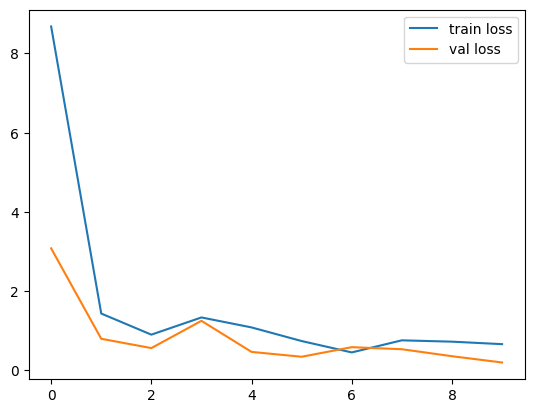

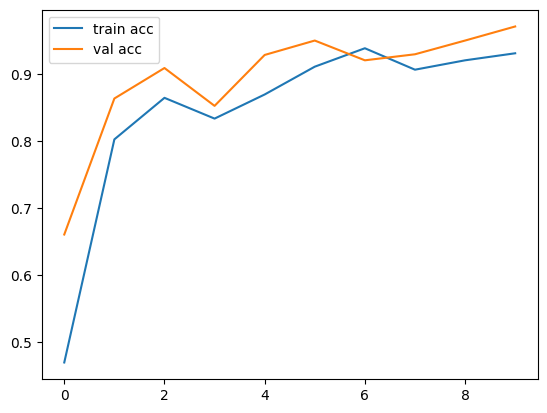

<Figure size 640x480 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [21]:

y_pred = model.predict(test_set)


63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 249ms/step


In [22]:
y_pred

array([[1.4471442e-35, 1.9898438e-43, 2.6394259e-31, ..., 1.0000000e+00,
        6.0335804e-37, 1.3242350e-36],
       [5.8555554e-07, 1.4328229e-20, 4.1662836e-37, ..., 1.4076940e-22,
        2.3680905e-13, 3.1112116e-24],
       [2.2007182e-38, 0.0000000e+00, 0.0000000e+00, ..., 1.2323414e-37,
        1.5834566e-22, 1.0000000e+00],
       ...,
       [1.0582684e-28, 4.3893087e-30, 2.0624402e-27, ..., 1.4358257e-30,
        1.7863234e-20, 4.3664115e-38],
       [1.0371065e-29, 5.3262877e-35, 1.7179585e-32, ..., 4.2564441e-40,
        7.7440328e-19, 1.4481156e-28],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([7, 3, 9, ..., 5, 5, 8])

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model('model_resnet50.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'model_resnet50.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [27]:
img_data

NameError: name 'img_data' is not defined

In [28]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/Test/Coffee/download (2).jpg'

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__